In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/larsheijnen/Thesis/data/MDS-UPDRS_Part_III_21Mar2025.csv')

In [24]:
motor_features = [
    'PATNO', 'EVENT_ID', 'INFODT',  # Identifying information
    
    # MDS-UPDRS Part III scores
    'NP3SPCH', 'NP3FACXP', 
    'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL',  # Rigidity
    'NP3FTAPR', 'NP3FTAPL',  # Finger tapping
    'NP3HMOVR', 'NP3HMOVL',  # Hand movements
    'NP3PRSPR', 'NP3PRSPL',  # Pronation-supination
    'NP3TTAPR', 'NP3TTAPL',  # Toe tapping
    'NP3LGAGR', 'NP3LGAGL',  # Leg agility
    'NP3RISNG',  # Arising from chair
    'NP3GAIT', 'NP3FRZGT',  # Gait and freezing
    'NP3PSTBL',  # Postural stability
    'NP3POSTR',  # Posture
    'NP3BRADY',  # Body bradykinesia
    'NP3PTRMR', 'NP3PTRML',  # Postural tremor
    'NP3KTRMR', 'NP3KTRML',  # Kinetic tremor
    'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ', 'NP3RTCON',  # Rest tremor
    'NP3TOT'  # Total score
]

# Create the DataFrame with selected features (only keep columns that exist in the data)
motor_df = data[[col for col in motor_features if col in data.columns]]

# Display the first few rows to verify the contents
print(f"Motor assessment DataFrame shape: {motor_df.shape}")
motor_df.head()

Motor assessment DataFrame shape: (32346, 37)


,PATNO,EVENT_ID,INFODT,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,...,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,NP3TOT
0,3000,BL,02/2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,3000,V04,03/2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3000,V06,02/2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,3000,V08,03/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,3000,V10,03/2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0


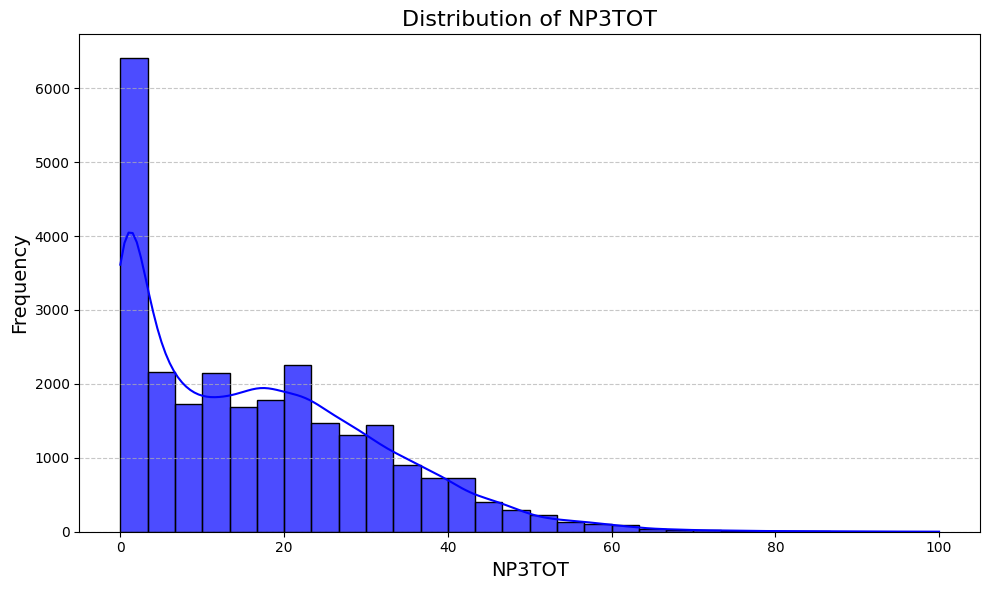

In [25]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(motor_df['NP3TOT'], kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of NP3TOT', fontsize=16)
plt.xlabel('NP3TOT', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

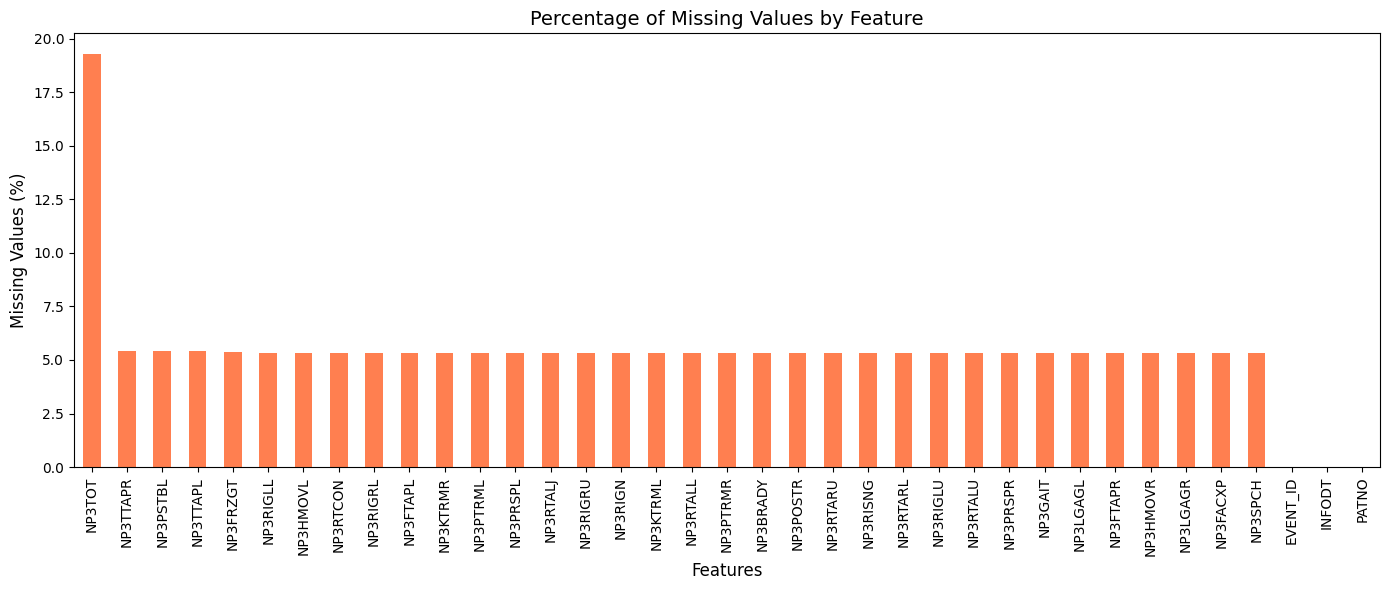

In [26]:
missing_percentage = motor_df.isnull().mean() * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# for column, percentage in missing_percentage_sorted.items():
#     print(f"{column}: {percentage:.2f}% missing")

plt.figure(figsize=(14, 6))
missing_percentage_sorted.plot(kind='bar', color='coral')
plt.title('Percentage of Missing Values by Feature', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Missing Values (%)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [27]:
#Removing NaN in NP3TOT
motor_df = motor_df.dropna(subset=['NP3TOT'])

print(f"Updated DataFrame shape: {motor_df.shape}")
motor_df.head()

Updated DataFrame shape: (26109, 37)


,PATNO,EVENT_ID,INFODT,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,...,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,NP3TOT
0,3000,BL,02/2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,3000,V04,03/2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3000,V06,02/2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,3000,V08,03/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,3000,V10,03/2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0


/var/folders/kw/d3zgy6jx0gl0lybbg494yl8c0000gn/T/ipykernel_16883/1230548637.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  motor_df['INFODT'] = pd.to_datetime(motor_df['INFODT'], errors='coerce')


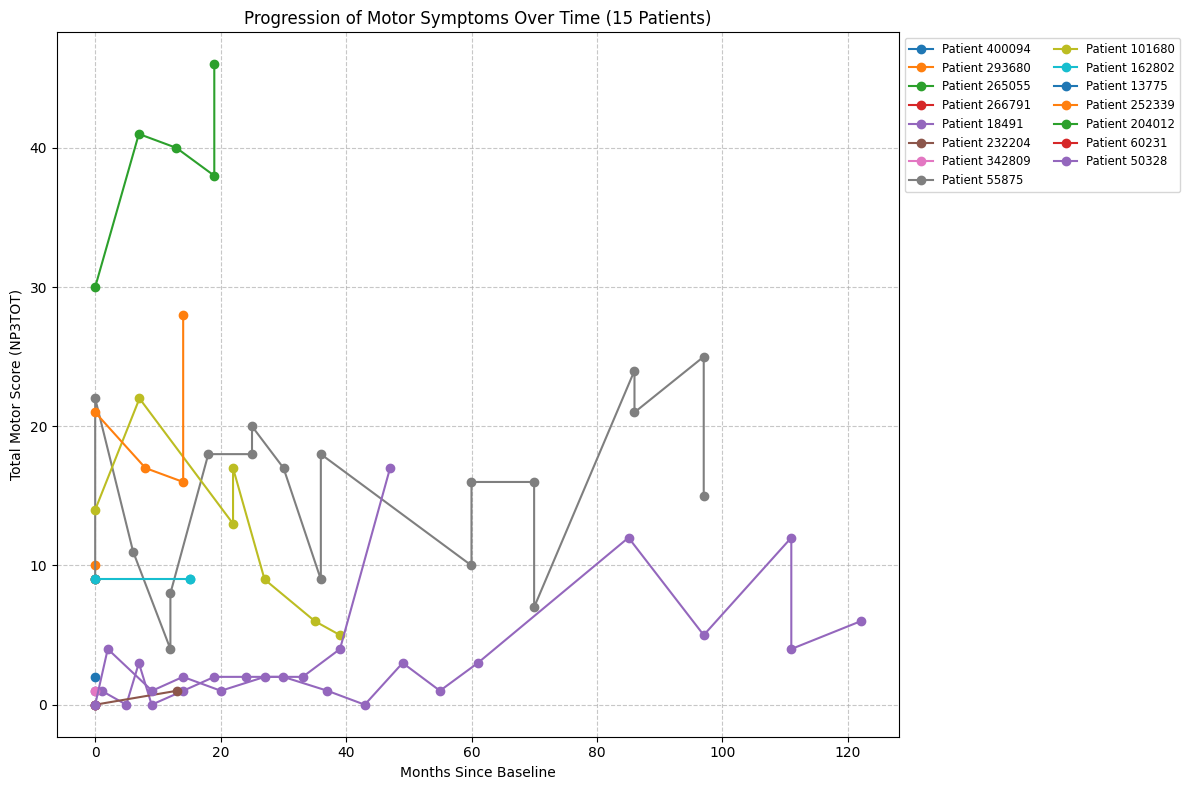

In [28]:
# Ensure the 'INFODT' column is in datetime format
motor_df['INFODT'] = pd.to_datetime(motor_df['INFODT'], errors='coerce')

# Calculate months since baseline for each patient
motor_df['months_since_baseline'] = motor_df.groupby('PATNO')['INFODT'].transform(
    lambda x: (x - x.min()).dt.days / 30.44  # Approximate months
)

# Select 15 random patients
patients = np.random.choice(motor_df['PATNO'].unique(), 15, replace=False)
plot_data = motor_df[motor_df['PATNO'].isin(patients)]

# Plot
plt.figure(figsize=(12, 8))
for patno in patients:
    patient_data = plot_data[plot_data['PATNO'] == patno].sort_values('months_since_baseline')
    plt.plot(patient_data['months_since_baseline'], patient_data['NP3TOT'], marker='o', label=f'Patient {patno}')
plt.xlabel('Months Since Baseline')
plt.ylabel('Total Motor Score (NP3TOT)')
plt.title('Progression of Motor Symptoms Over Time (15 Patients)')
plt.legend(fontsize='small', ncol=2, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Correlation coefficient: 0.20
P-value: 3.09e-234


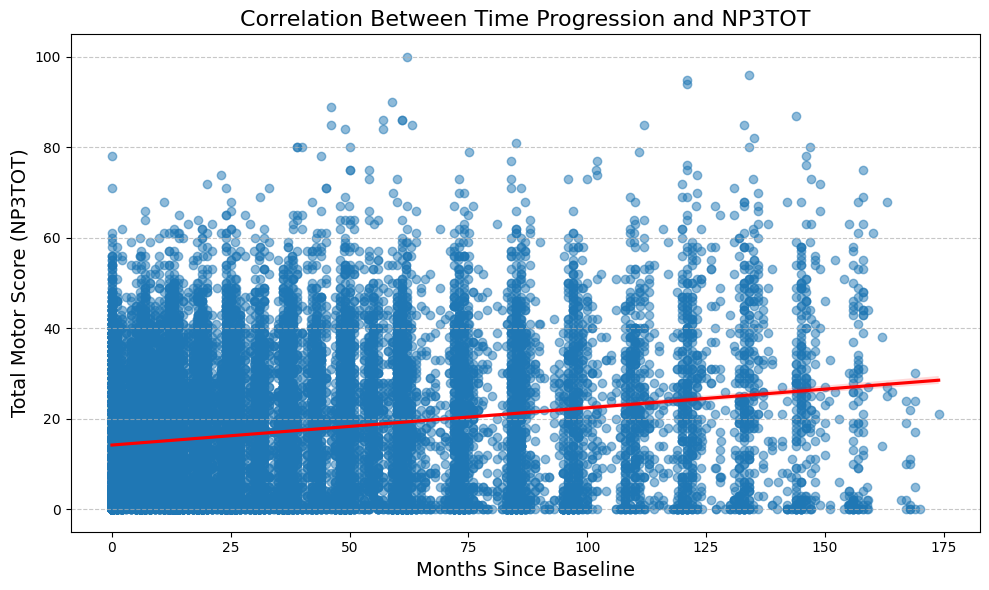

In [29]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient
correlation, p_value = pearsonr(motor_df['months_since_baseline'], motor_df['NP3TOT'])
print(f"Correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.regplot(x='months_since_baseline', y='NP3TOT', data=motor_df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Correlation Between Time Progression and NP3TOT', fontsize=16)
plt.xlabel('Months Since Baseline', fontsize=14)
plt.ylabel('Total Motor Score (NP3TOT)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


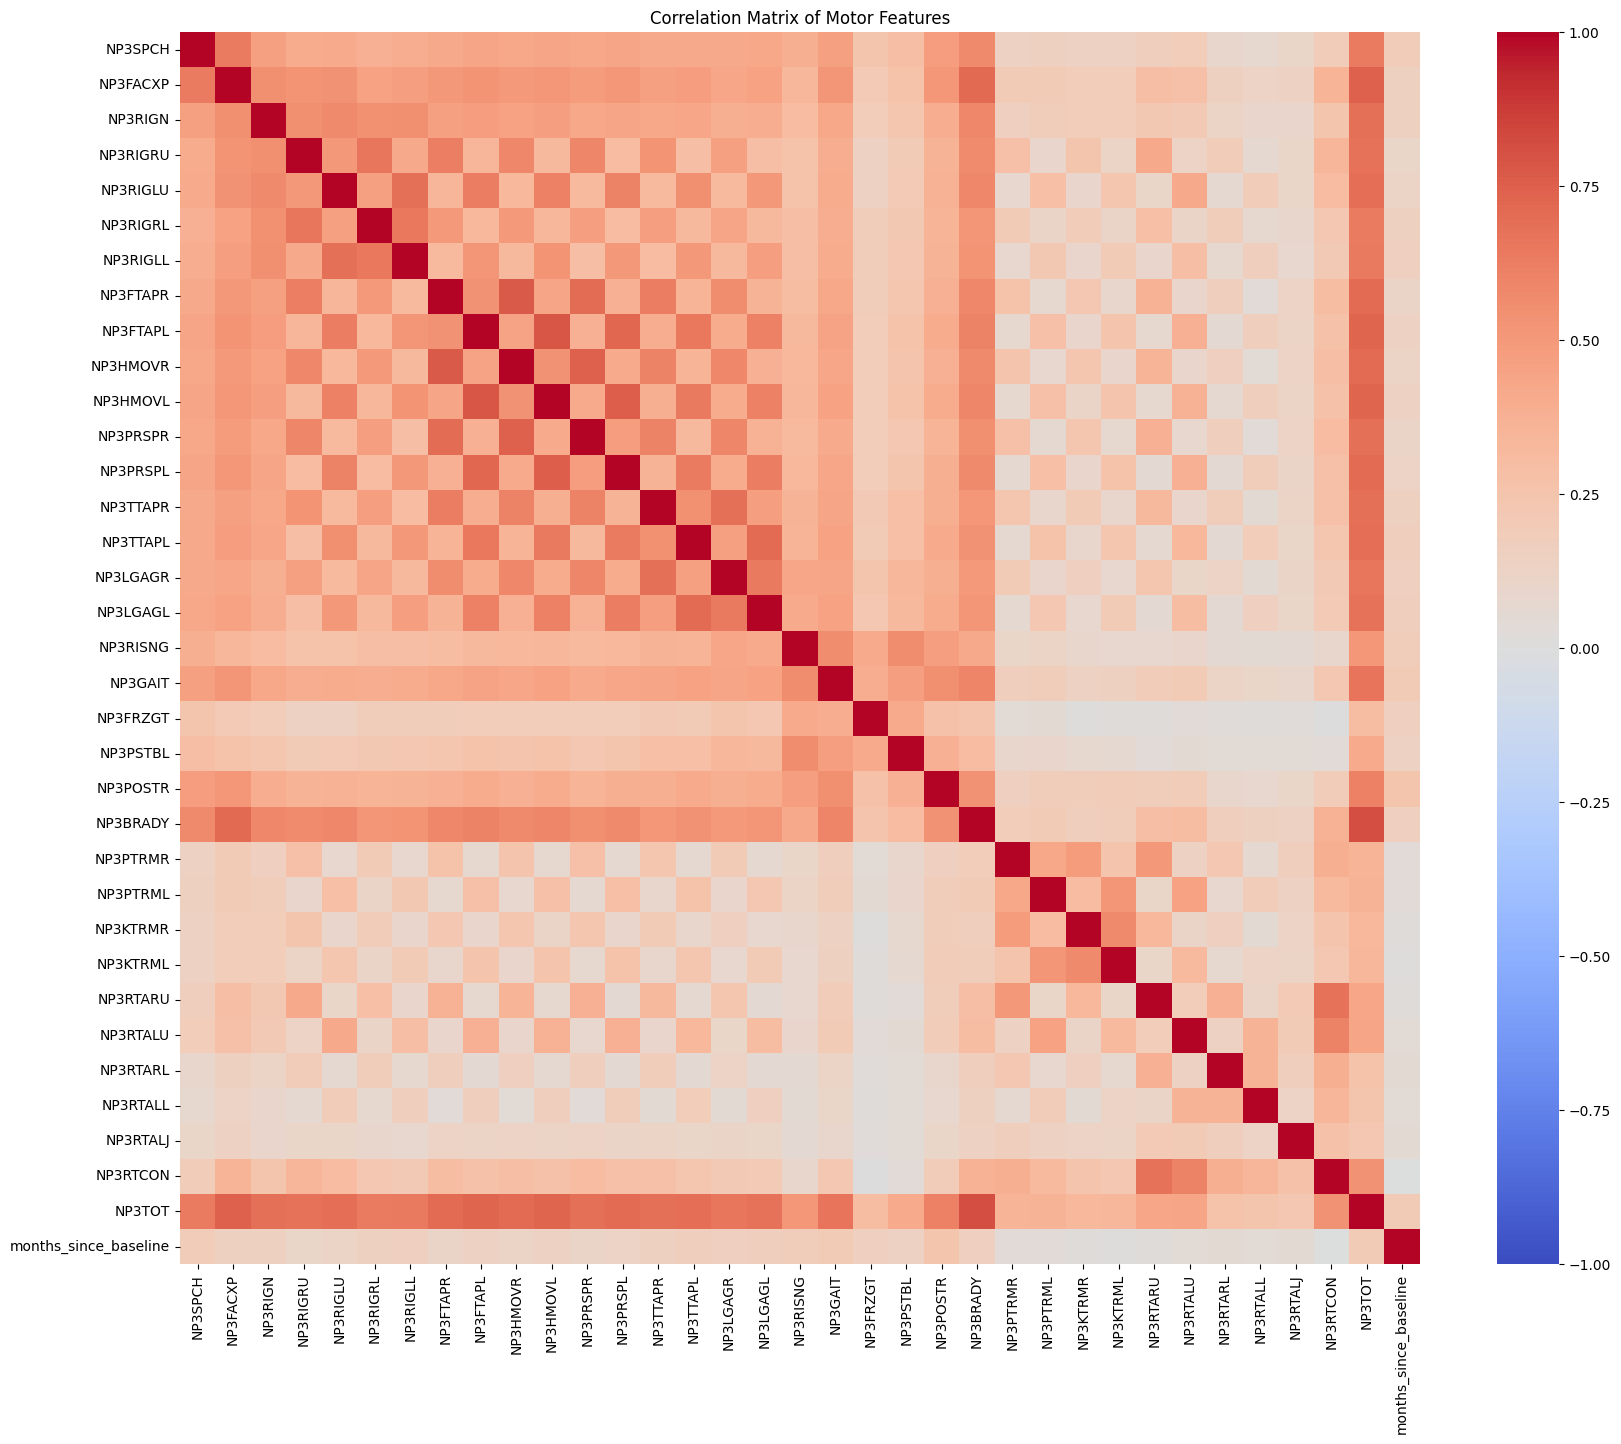

In [30]:
import seaborn as sns

# Select motor feature columns
motor_features = [col for col in motor_df.columns if col not in ['PATNO', 'EVENT_ID', 'INFODT', 'DATE']]
corr_matrix = motor_df[motor_features].corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Motor Features')
plt.show()

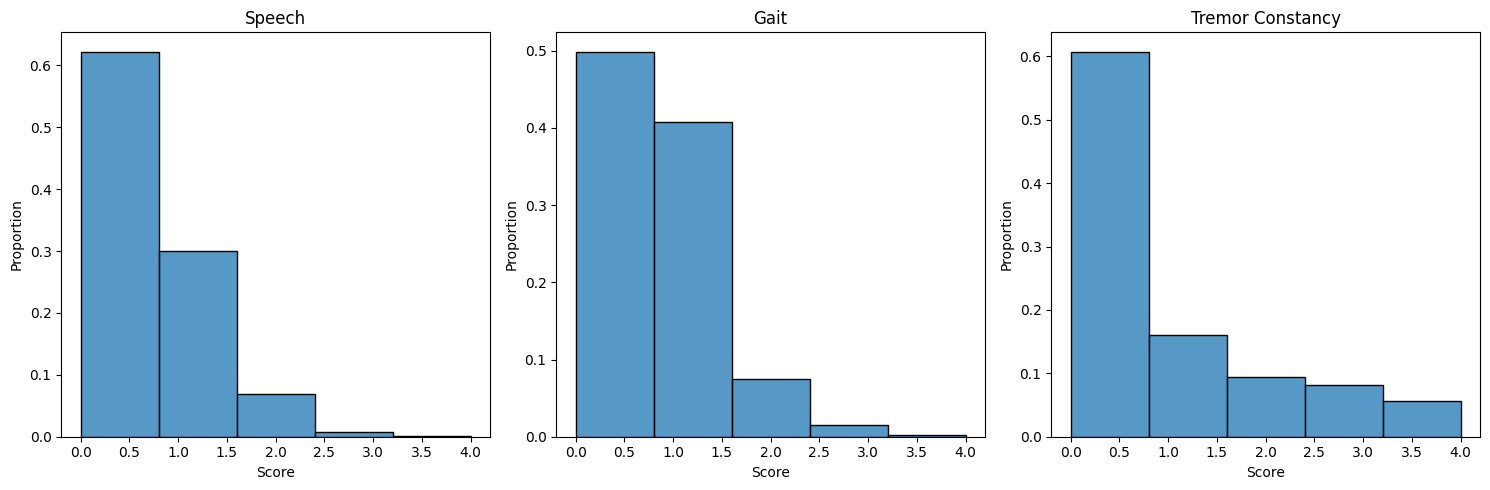

In [31]:
features_to_plot = ['NP3SPCH', 'NP3GAIT', 'NP3RTCON']
feature_names = ['Speech', 'Gait', 'Tremor Constancy']

plt.figure(figsize=(15, 5))
for i, (feature, name) in enumerate(zip(features_to_plot, feature_names), 1):
    plt.subplot(1, 3, i)
    sns.histplot(motor_df[feature], bins=5, stat='probability')
    plt.xlabel('Score')
    plt.ylabel('Proportion')
    plt.title(name)
plt.tight_layout()
plt.show()

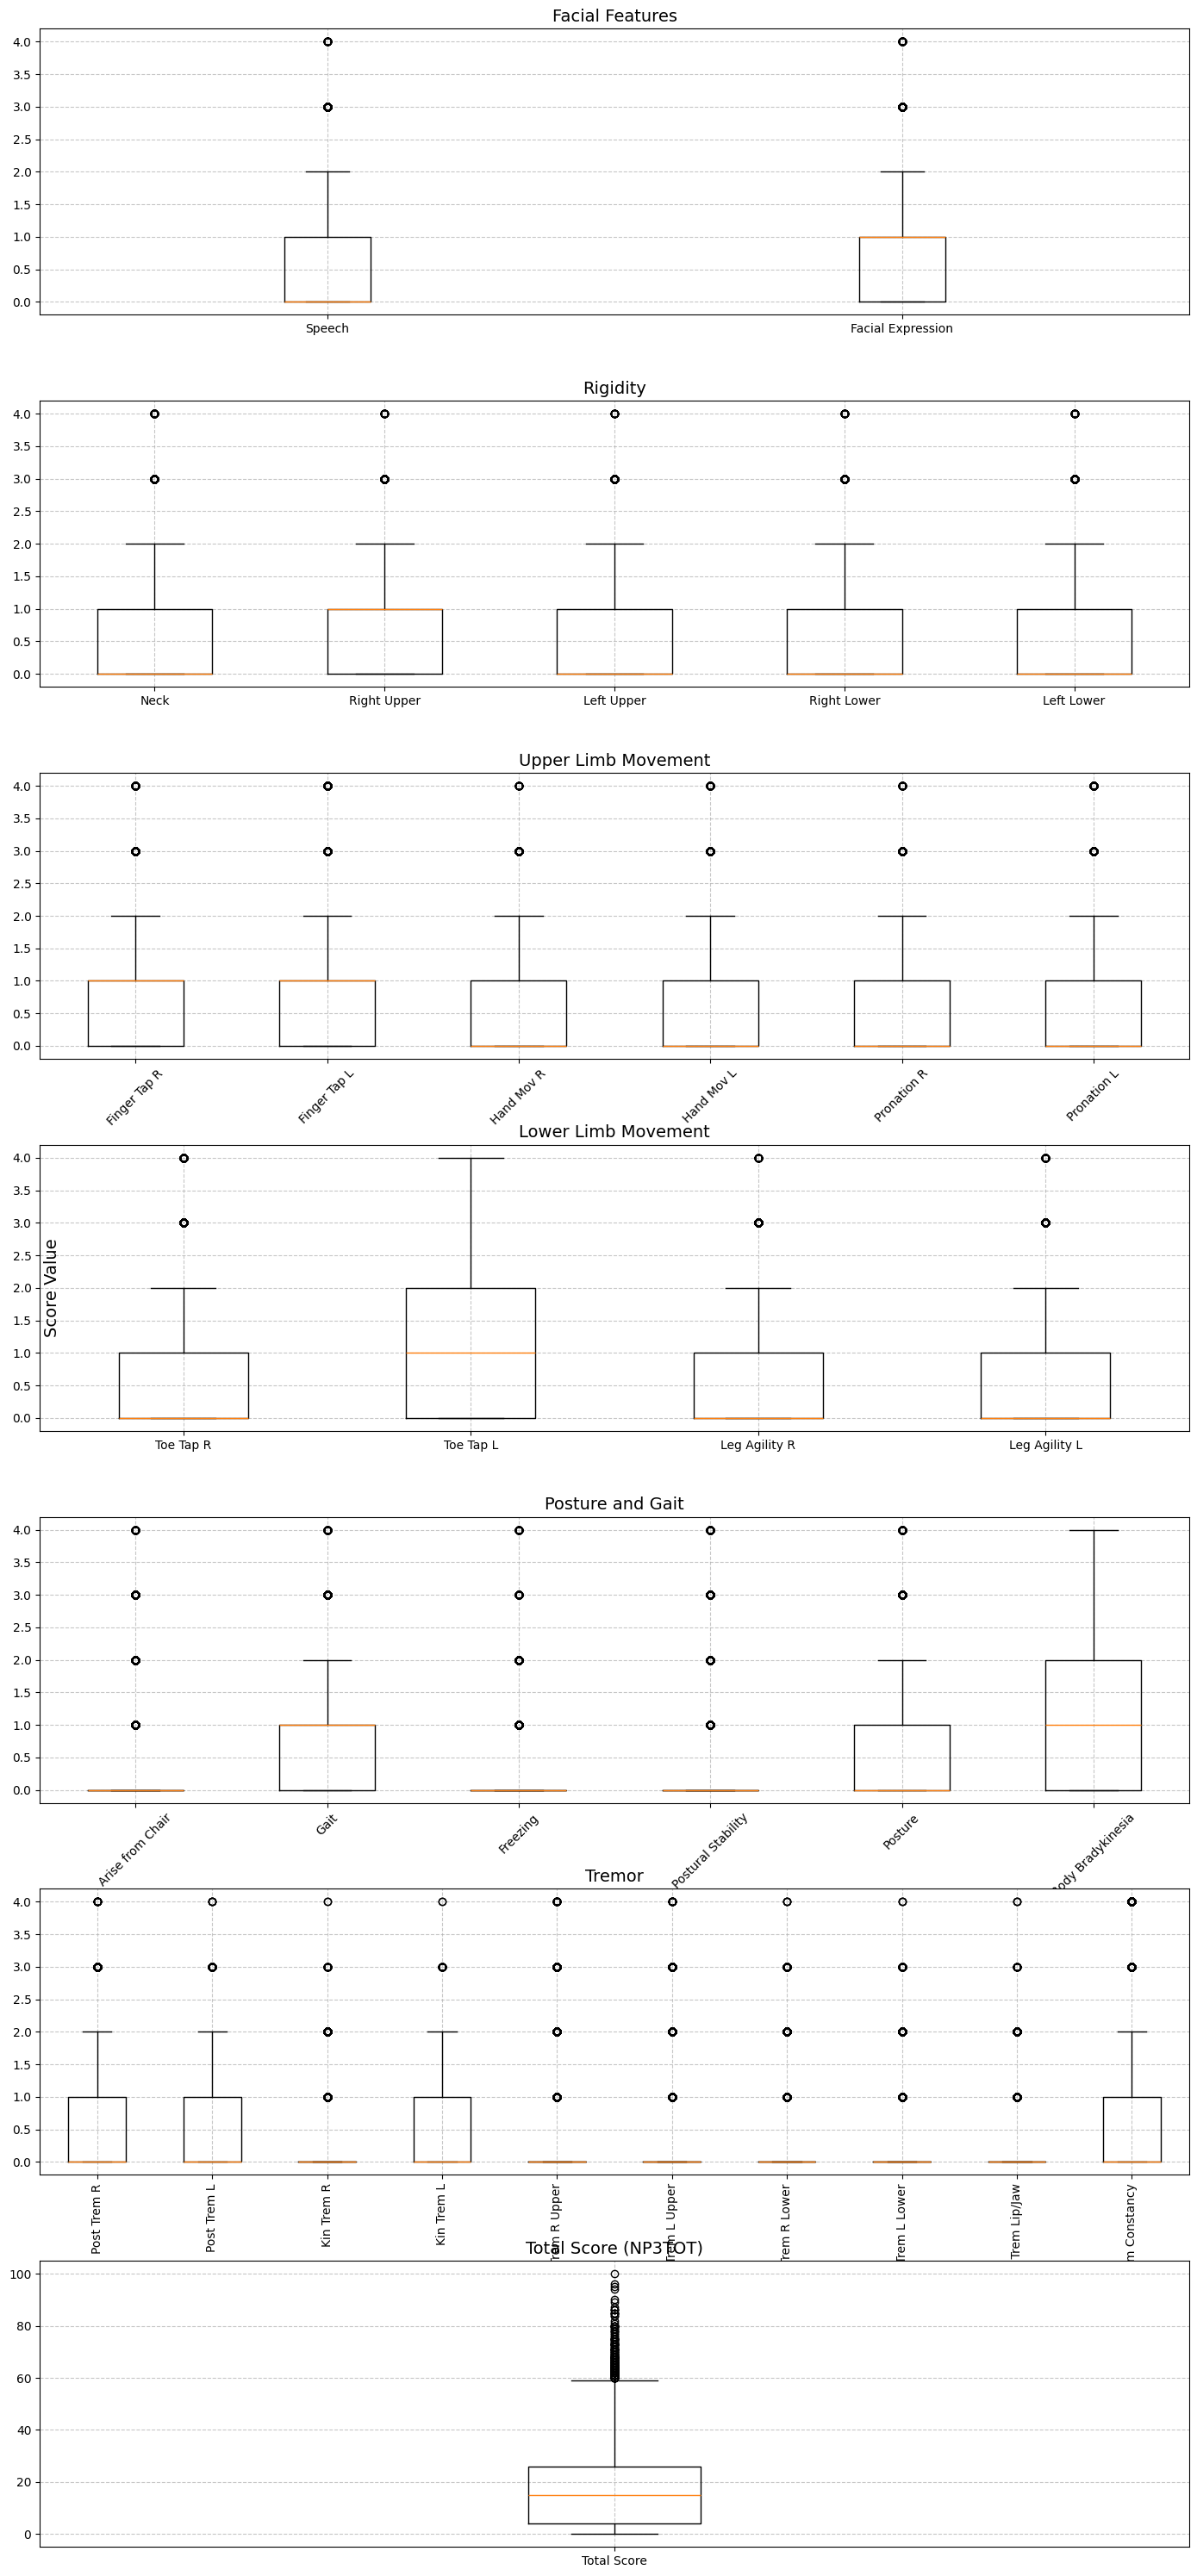

Summary statistics for total score (NP3TOT):
count    26109.000000
mean        16.869126
std         14.683221
min          0.000000
25%          4.000000
50%         15.000000
75%         26.000000
max        100.000000
Name: NP3TOT, dtype: float64


In [32]:
# Create a figure with subplots for each category of features
fig, axs = plt.subplots(7, 1, figsize=(14, 30))

# Facial features
axs[0].boxplot([motor_df['NP3SPCH'], motor_df['NP3FACXP']])
axs[0].set_title('Facial Features', fontsize=14)
axs[0].set_xticklabels(['Speech', 'Facial Expression'])
axs[0].grid(True, linestyle='--', alpha=0.7)

# Rigidity features
rigidity_cols = ['NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL']
rigidity_labels = ['Neck', 'Right Upper', 'Left Upper', 'Right Lower', 'Left Lower']
axs[1].boxplot([motor_df[col] for col in rigidity_cols])
axs[1].set_title('Rigidity', fontsize=14)
axs[1].set_xticklabels(rigidity_labels)
axs[1].grid(True, linestyle='--', alpha=0.7)

# Upper limb movement
upper_limb_cols = ['NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL']
upper_limb_labels = ['Finger Tap R', 'Finger Tap L', 'Hand Mov R', 'Hand Mov L', 'Pronation R', 'Pronation L']
axs[2].boxplot([motor_df[col] for col in upper_limb_cols])
axs[2].set_title('Upper Limb Movement', fontsize=14)
axs[2].set_xticklabels(upper_limb_labels, rotation=45)
axs[2].grid(True, linestyle='--', alpha=0.7)

# Lower limb movement
lower_limb_cols = ['NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL']
lower_limb_labels = ['Toe Tap R', 'Toe Tap L', 'Leg Agility R', 'Leg Agility L']
axs[3].boxplot([motor_df[col] for col in lower_limb_cols])
axs[3].set_title('Lower Limb Movement', fontsize=14)
axs[3].set_xticklabels(lower_limb_labels)
axs[3].grid(True, linestyle='--', alpha=0.7)

# Posture and gait
posture_gait_cols = ['NP3RISNG', 'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY']
posture_gait_labels = ['Arise from Chair', 'Gait', 'Freezing', 'Postural Stability', 'Posture', 'Body Bradykinesia']
axs[4].boxplot([motor_df[col] for col in posture_gait_cols])
axs[4].set_title('Posture and Gait', fontsize=14)
axs[4].set_xticklabels(posture_gait_labels, rotation=45)
axs[4].grid(True, linestyle='--', alpha=0.7)

# Tremor
tremor_cols = ['NP3PTRMR', 'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 
               'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ', 'NP3RTCON']
tremor_labels = ['Post Trem R', 'Post Trem L', 'Kin Trem R', 'Kin Trem L',
                'Rest Trem R Upper', 'Rest Trem L Upper', 'Rest Trem R Lower', 
                'Rest Trem L Lower', 'Rest Trem Lip/Jaw', 'Rest Trem Constancy']
axs[5].boxplot([motor_df[col] for col in tremor_cols])
axs[5].set_title('Tremor', fontsize=14)
axs[5].set_xticklabels(tremor_labels, rotation=90)
axs[5].grid(True, linestyle='--', alpha=0.7)

# Total score separately
axs[6].boxplot(motor_df['NP3TOT'])
axs[6].set_title('Total Score (NP3TOT)', fontsize=14)
axs[6].set_xticklabels(['Total Score'])
axs[6].grid(True, linestyle='--', alpha=0.7)

# Add shared y-axis label
fig.text(0.04, 0.5, 'Score Value', va='center', rotation='vertical', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()

# Display summary statistics for the total score
print("Summary statistics for total score (NP3TOT):")
print(motor_df['NP3TOT'].describe())

In [33]:
# Display summary statistics
print("Summary statistics for all features:")
motor_df.describe().round(2).T.drop('PATNO')

Summary statistics for all features:


,count,mean,min,25%,50%,75%,max,std
INFODT,26109,2019-03-06 04:07:35.015512064,2010-07-01 00:00:00,2015-07-01 00:00:00,2019-02-01 00:00:00,2023-07-01 00:00:00,2025-03-01 00:00:00,NaN
NP3SPCH,26109.0,0.47,0.0,0.0,0.0,1.0,4.0,0.67
NP3FACXP,26109.0,0.85,0.0,0.0,1.0,1.0,4.0,0.87
NP3RIGN,26109.0,0.58,0.0,0.0,0.0,1.0,4.0,0.83
NP3RIGRU,26109.0,0.77,0.0,0.0,1.0,1.0,4.0,0.87
NP3RIGLU,26109.0,0.65,0.0,0.0,0.0,1.0,4.0,0.85
NP3RIGRL,26109.0,0.48,0.0,0.0,0.0,1.0,4.0,0.79
NP3RIGLL,26109.0,0.47,0.0,0.0,0.0,1.0,4.0,0.79
NP3FTAPR,26109.0,0.81,0.0,0.0,1.0,1.0,4.0,0.92
NP3FTAPL,26109.0,0.84,0.0,0.0,1.0,1.0,4.0,0.97


In [35]:
# Define a function to detect and remove outliers using the IQR method
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Apply the function to the 'NP3TOT' column
motor_df_no_outliers = remove_outliers_iqr(motor_df, 'NP3TOT')

print(f"Original DataFrame shape: {motor_df.shape}")
print(f"DataFrame shape after removing outliers: {motor_df_no_outliers.shape}")
motor_df_no_outliers.head()

Original DataFrame shape: (26109, 38)
DataFrame shape after removing outliers: (25891, 38)


,PATNO,EVENT_ID,INFODT,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,...,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,NP3TOT,months_since_baseline
0,3000,BL,2011-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.000000
1,3000,V04,2012-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.943495
2,3000,V06,2013-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,24.014455
3,3000,V08,2014-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,36.925099
4,3000,V10,2015-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,48.915900


In [36]:
from sklearn.preprocessing import StandardScaler

motor_df_standardized = motor_df_no_outliers.copy()

# Identify columns to scale: we exclude identifiers and date fields
columns_to_scale = [col for col in motor_df_no_outliers.columns if col not in ['PATNO', 'EVENT_ID', 'INFODT']]

scaler = StandardScaler()
motor_df_standardized[columns_to_scale] = scaler.fit_transform(motor_df_standardized[columns_to_scale])

motor_df_standardized.head()

,PATNO,EVENT_ID,INFODT,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,...,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,NP3TOT,months_since_baseline
0,3000,BL,2011-02-01,-0.696361,-0.980552,-0.698901,-0.883099,-0.763106,-0.611407,-0.584252,...,-0.536519,-0.595822,-0.508156,-0.466438,-0.273693,-0.255866,-0.188199,-0.663836,-0.891230,-0.915988
1,3000,V04,2012-03-01,-0.696361,-0.980552,-0.698901,-0.883099,-0.763106,-0.611407,-0.584252,...,-0.536519,-0.595822,-0.508156,-0.466438,-0.273693,-0.255866,-0.188199,-0.663836,-1.106147,-0.549865
2,3000,V06,2013-02-01,-0.696361,-0.980552,-0.698901,-0.883099,-0.763106,-0.611407,-0.584252,...,-0.536519,-0.595822,-0.508156,-0.466438,-0.273693,-0.255866,-0.188199,-0.663836,-0.891230,-0.236709
3,3000,V08,2014-03-01,-0.696361,-0.980552,-0.698901,-0.883099,-0.763106,-0.611407,-0.584252,...,-0.536519,-0.595822,-0.508156,-0.466438,-0.273693,-0.255866,-0.188199,-0.663836,-1.034508,0.128484
4,3000,V10,2015-03-01,-0.696361,-0.980552,-0.698901,-0.883099,-0.763106,-0.611407,-0.584252,...,1.410365,1.202759,-0.508156,-0.466438,-0.273693,-0.255866,-0.188199,-0.663836,0.183358,0.467659
